<a href="https://colab.research.google.com/github/Mehrnoushhk/Data/blob/master/PinAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading data
url= 'https://raw.githubusercontent.com/Mehrnoushhk/DeepLearning/master/GBPUSDm30.csv'
data= pd.read_csv(url) 
data.columns= ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'] 


In [3]:
# Converting Time and Date to proper DateTime format
%%time
import datetime
for i in range(0, data.shape[0]):
  temptext= data.iloc[i, 0]
  a= int(temptext[0:4])
  b= int(temptext[5:7])
  c= int(temptext[8:])
  temptime= data.iloc[i, 1]
  h= int(temptime[:-3])
  m= int(temptime[3:])
  tempdate= datetime.datetime(year= a, month= b, day= c, hour= h, minute= m, second= 0)
  data.iloc[i,0]= tempdate

CPU times: user 46.3 s, sys: 1.05 s, total: 47.4 s
Wall time: 47.4 s


In [4]:
del data['Time']
data.set_index('Date', inplace= True)
data.index= pd.to_datetime(data.index)

In [5]:
data.tail(n= 5)

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-17 19:30:00,1.25322,1.25414,1.25304,1.25413,5297
2020-06-17 20:00:00,1.25416,1.25526,1.25383,1.25498,4196
2020-06-17 20:30:00,1.25498,1.25576,1.25487,1.25552,3469
2020-06-17 21:00:00,1.25553,1.25568,1.25482,1.25506,3536
2020-06-17 21:30:00,1.25505,1.25517,1.25451,1.25454,1284


In [ ]:
data.to_csv('GBPm30.csv')

     |████████████████████████████████| 51kB 1.6MB/s 


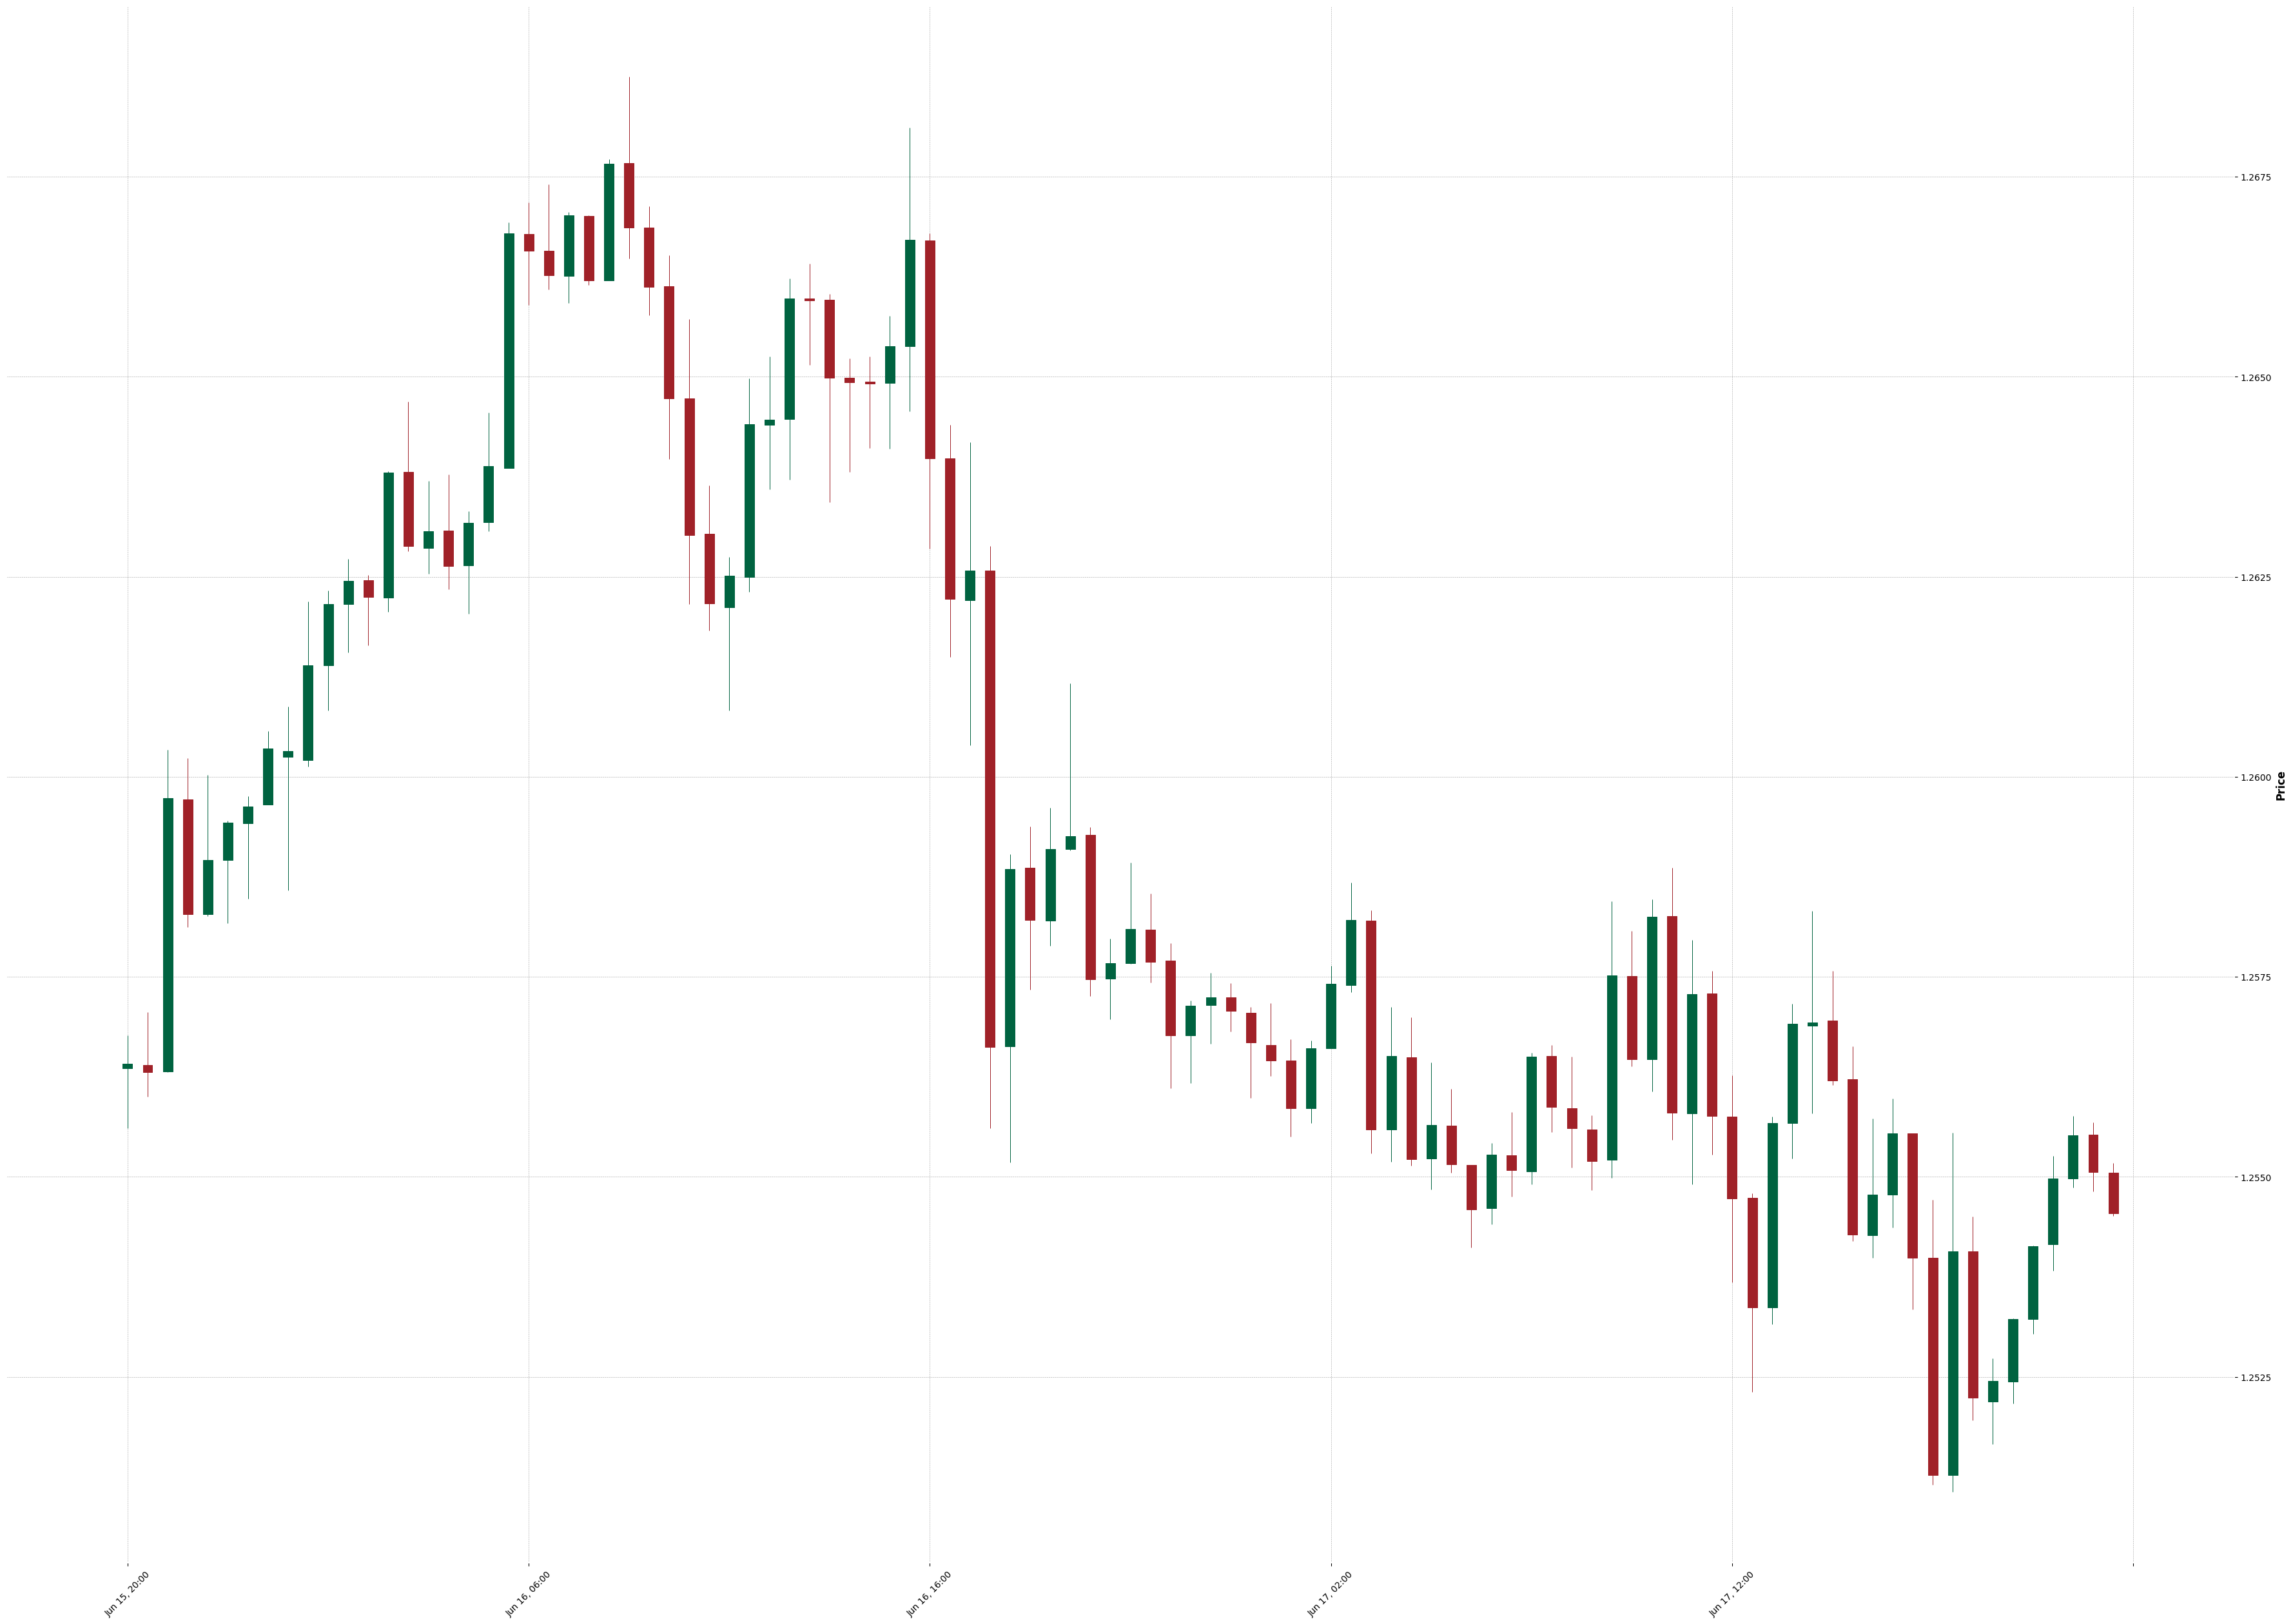

In [6]:
!pip install mplfinance
import mplfinance as mpl
mpl.plot(data.iloc[data.shape[0]-100: data.shape[0],:], type= 'candle', style= 'charles', figscale= 6) # , savefig= '/content/Plots/fig01.png'

In [11]:
# Define Local Maximum
def localMax(data, step):
  isMax= []
  maxValue= []
  for i in range(0, step):
    isMax.append(np.nan)
    maxValue.append(np.nan)
  for i in range(step, data.shape[0]-step):
    tempOptimal= True
    tempValue= data.iloc[i, 1]
    for j in range(1, step+1):
      if (data.iloc[i,1] < data.iloc[i-j,1]) or (data.iloc[i,1] < data.iloc[i+j, 1]):
        tempOptimal= False
        tempValue= np.nan
    isMax.append(tempOptimal)
    maxValue.append(tempValue)
  for i in range(0, step):
    isMax.append(np.nan)
    maxValue.append(np.nan)  
  return isMax, maxValue


In [12]:
%%time
dataMax, dataMaxValue= localMax(data, 5)

CPU times: user 5.6 s, sys: 3.81 ms, total: 5.61 s
Wall time: 5.61 s


In [13]:
data['isMax']= dataMax
data['maxValue']= dataMaxValue

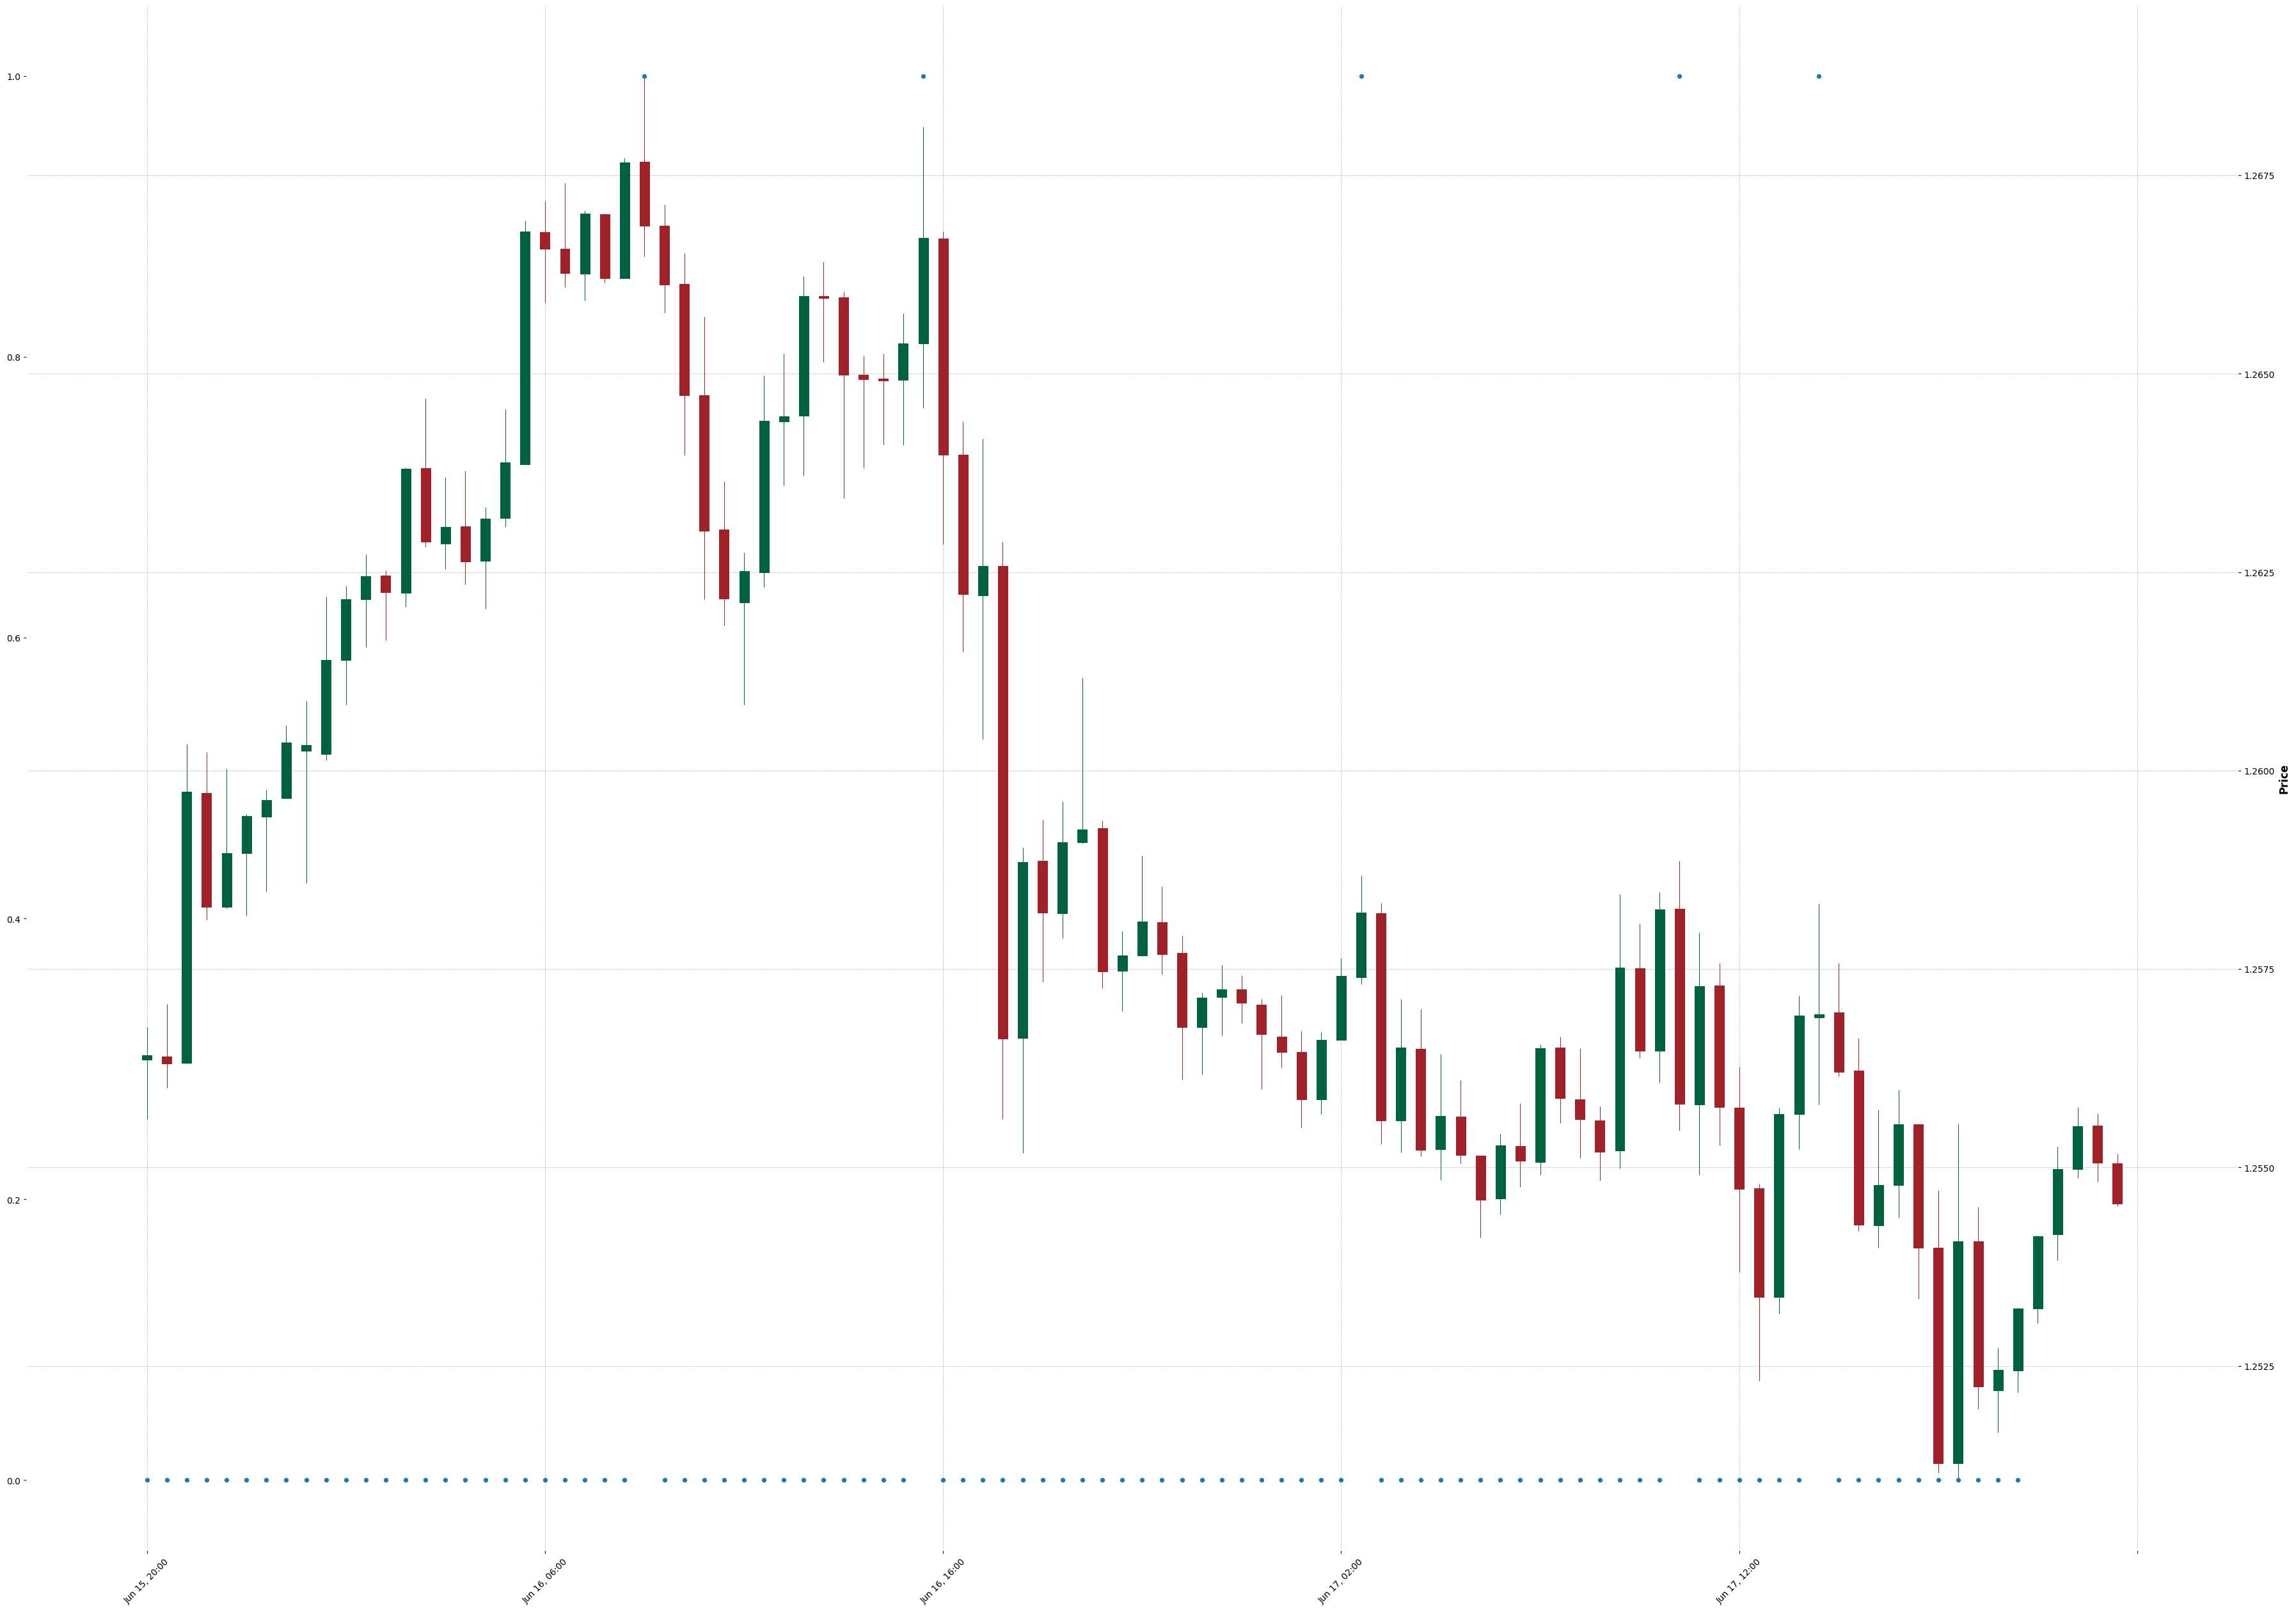

In [14]:
adp= mpl.make_addplot(data.iloc[data.shape[0]-100: data.shape[0], 6], type= 'scatter')
mpl.plot(data.iloc[data.shape[0]-100: data.shape[0],:], type= 'candle', style= 'charles', figscale= 6, addplot= adp)

In [ ]:
#The simplest performance meyric
%%time
def performance(x, y):
  perf= (y- x)/x
  return perf
upPerformance= []
downPerformance= []
for i in range(0, data.shape[0]-1-5):
  upTemp= performance(data.iloc[i, 3], data.iloc[i+5, 1])
  upPerformance.append(upTemp)
  downTemp= performance(data.iloc[i, 3], data.iloc[i+5, 2])
  downPerformance.append(downTemp)

#data['Up']= upPerformance
#data['Down']= downPerformance
 


CPU times: user 33.8 s, sys: 7.6 ms, total: 33.9 s
Wall time: 33.9 s


In [ ]:
upPerformance[-20:]

[3.976079903310127e-05,
 -0.00015917610448317745,
 -0.0027498509835088563,
 -3.9815257206645574e-05,
 -9.544413336718787e-05,
 0.0020386061030771147,
 0.0022634351613495937,
 0.0026009877370607387,
 4.778325515457802e-05,
 -0.0007399097787431856,
 -0.0011058690619207136,
 -0.0011861168603725452,
 0.0010125330867111846,
 -0.0002231466870686957,
 -0.002238080825780126,
 -0.0006060654391184092,
 0.0022936696316541816,
 0.0009489103479072335,
 0.0028109627547434736,
 0.0025789452672760143]

In [ ]:
# Function to search for Pinbar


In [ ]:
# Function to see what happens after 




In [ ]:
# Create LSTM model




In [ ]:
# Feed data to model

